In [ ]:
# Reload code changes without restarting kernel
%load_ext autoreload
%autoreload 2

# Import libraries
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import logging

from bird_cv.get_label_studio_annotations import get_label_studio_annotations
from bird_cv.get_label_tables import get_label_tables
from bird_cv.annotations_to_yolo import stream_annotations_to_yolo
from bird_cv.show_yolo_annotations import show_annotated_frame
from bird_cv.get_split_guidance import split_camera_data


API_KEY = "FILL"
LABEL_JSON_PATH = Path("scratch/annotations.json")
LABEL_JSON_INTERPOLATED_PATH = Path("scratch/annotations_interpolated.json")

PROCESSED_LABEL_DIR = Path("scratch")

In [123]:
# Set up logging to view code progress
logging.basicConfig(
    level=logging.INFO,  # or DEBUG for more detail
    format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
)

In [124]:
# Export annotations out of label studio
get_label_studio_annotations(
    host="localhost",
    port=8080,
    api_key=API_KEY,
    project_name="Bird CV",
    output_path=LABEL_JSON_PATH,
    interpolate_frames=False,
)

2026-01-10 17:26:15,706 - INFO - bird_cv.get_label_studio_annotations - Starting annotation export for project 'Bird CV'
2026-01-10 17:26:15,708 - INFO - bird_cv.get_label_studio_annotations - Found open port: 8080
2026-01-10 17:26:15,708 - INFO - bird_cv.get_label_studio_annotations - Starting Label Studio at localhost:8080


2026-01-10 17:26:18,964 - INFO - httpx - HTTP Request: POST http://localhost:8080/api/token/refresh/ "HTTP/1.1 200 OK"
2026-01-10 17:26:18,970 - INFO - httpx - HTTP Request: GET http://localhost:8080/api/current-user/whoami "HTTP/1.1 200 OK"
2026-01-10 17:26:18,971 - INFO - bird_cv.get_label_studio_annotations - Label Studio connection verified
2026-01-10 17:26:18,991 - INFO - httpx - HTTP Request: GET http://localhost:8080/api/projects/?page=1 "HTTP/1.1 200 OK"
2026-01-10 17:26:18,993 - INFO - bird_cv.get_label_studio_annotations - Found project 'Bird CV' with ID 3
2026-01-10 17:26:18,993 - INFO - bird_cv.get_label_studio_annotations - Creating export snapshot for project 3
2026-01-10 17:26:19,021 - INFO - httpx - HTTP Request: POST http://localhost:8080/api/projects/3/exports/ "HTTP/1.1 201 Created"
2026-01-10 17:26:19,028 - INFO - httpx - HTTP Request: GET http://localhost:8080/api/projects/3/exports/33 "HTTP/1.1 200 OK"
2026-01-10 17:26:19,028 - INFO - bird_cv.get_label_studio_anno

In [125]:
# Process the tables and generate the output files
get_label_tables(label_json_path=LABEL_JSON_PATH, output_dir=PROCESSED_LABEL_DIR)

In [34]:
# Get split guidance
# Let's try to demo this from the labels I made
split_camera_data(
    video_data_path=PROCESSED_LABEL_DIR / "video_data.ndjson",
    frame_data_path=PROCESSED_LABEL_DIR / "frame_data.ndjson",
    split_ratio={"train": 0.5, "val": 0.5},
    output_path=Path("scratch"),
)

In [ ]:
# Export interpolated annotations out of label studio
get_label_studio_annotations(
    host="localhost",
    port=8080,
    api_key=API_KEY,
    project_name="Bird CV",
    output_path=LABEL_JSON_INTERPOLATED_PATH,
    interpolate_frames=True,
)

In [ ]:
# Stream annotations and convert them to yolo labels
stream_annotations_to_yolo(
    path_to_videos=Path("/Users/sdougherty/Documents/code/data/2021_bunting_clips"),
    path_to_annotations=LABEL_JSON_INTERPOLATED_PATH,
    path_to_output=Path("scratch/yolo_store"),
    path_to_guidance=Path("scratch") / "train_lookup.parquet",
    processes=4,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Processing videos: 1it [00:00,  4.47it/s]

Working on H7,I22/22.mp4
Video H7,I22/22.mp4 not in target
Working on H7,I22/08.mp4
Video H7,I22/08.mp4 not in target
Working on H7,I22/54.mp4
Video H7,I22/54.mp4 not in target
Working on H7,I22/33.mp4
Video H7,I22/33.mp4 not in target
Working on H7,I22/37.mp4
Video H7,I22/37.mp4 not in target
Working on H8,I29,I25,L12/08.mp4
Video H8,I29,I25,L12/08.mp4 not in target
Working on H8,I29,I25,L12/15.mp4
Video H8,I29,I25,L12/15.mp4 not in target
Working on H8,I29,I25,L12/22.mp4
Working on H8,I29,I25,L12/34.mp4


Processing videos: 8it [00:08,  1.04s/it]

902


Processing videos: 9it [00:34,  3.84s/it]

902


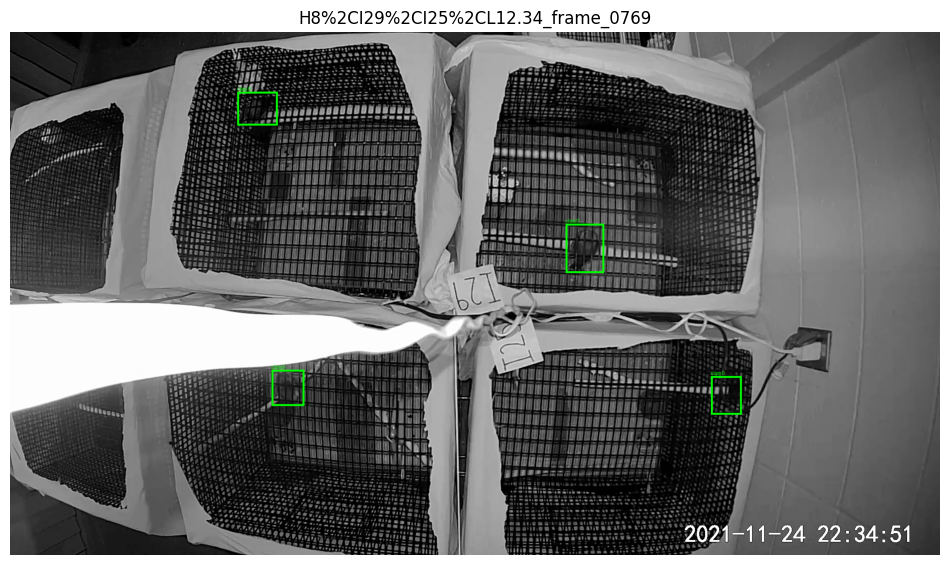

In [50]:
# Visualize labels
show_annotated_frame(
    path_to_yolo=Path("scratch/yolo_store"),
    frame_name="H8%2CI29%2CI25%2CL12.34_frame_0769.png",
)

## Scratch

In [110]:
# Process the tables and generate the output files
get_label_tables(label_json_path=LABEL_JSON_PATH, output_dir=PROCESSED_LABEL_DIR)

In [37]:
videos = pl.read_ndjson("scratch/video_data.ndjson")
videos

video_id,video_path,framesCount,duration,camera_id
i64,str,i64,f64,str
3,"""/data/local-files/?d=Users/sdo…",1502,60.065916,"""H7%2CI22"""
5,"""/data/local-files/?d=Users/sdo…",1502,60.065916,"""H7%2CI22"""
4,"""/data/local-files/?d=Users/sdo…",1502,60.065916,"""H7%2CI22"""
6,"""/data/local-files/?d=Users/sdo…",1502,60.065916,"""H8%2CI29%2CI25%2CL12"""
2,"""/data/local-files/?d=Users/sdo…",1502,60.065916,"""H7%2CI22"""
8,"""/data/local-files/?d=Users/sdo…",1502,60.065916,"""H8%2CI29%2CI25%2CL12"""
1,"""/data/local-files/?d=Users/sdo…",1502,60.065916,"""H7%2CI22"""
10,"""/data/local-files/?d=Users/sdo…",1502,60.065916,"""H8%2CI29%2CI25%2CL12"""
7,"""/data/local-files/?d=Users/sdo…",1502,60.065916,"""H8%2CI29%2CI25%2CL12"""


/var/folders/dn/1vsxzrkn18b5rm7z5x9zs4hh0000gn/T/ipykernel_40070/941400745.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="pastel")


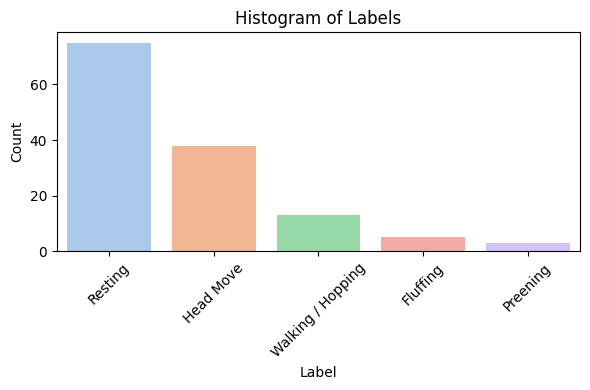

In [111]:
# Plot unique behavior labels
frames = pl.read_ndjson(Path("scratch") / "frame_data.ndjson")

# Count occurrences of each label
counts = (
    frames.unique(subset="track_id")
    .group_by("label")
    .len()
    .sort("len", descending=True)
)

# Convert to lists for seaborn
labels = counts["label"].to_list()
values = counts["len"].to_list()

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=values, palette="pastel")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Histogram of Labels")

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()